<a href="https://colab.research.google.com/github/H4rsh4nk/42-is-the-answer/blob/main/1_Layer_CNN_Gender_Identification_Using_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kevalbavvadiya","key":"b16cf5484c5a2d7cec7db144c1054715"}'}

In [ ]:
!ls -lha kaggle.json

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 70 Apr  4 01:11 kaggle.json


In [ ]:
!kaggle datasets download -d abhikjha/utk-face-cropped


100% 232M/232M [00:01<00:00, 106MB/s]
100% 232M/232M [00:01<00:00, 124MB/s]


In [ ]:
! ls


drive  kaggle.json  sample_data  utk-face-cropped.zip


In [ ]:
!mkdir input

In [ ]:
!unzip utk-face-cropped.zip -d input


Streaming output truncated to the last 5000 lines.
  inflating: input/utkcropped/utkcropped/53_0_1_20170116192938845.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_1_20170117181950281.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_1_20170120222553113.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_1_20170120222956787.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_1_20170120223004304.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_2_20170104210010763.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_2_20170112215433623.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_2_20170112221930338.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_2_20170116192925824.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_2_20170116192934154.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_2_20170119205816456.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_3_2017010422

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cv2
import os

import tensorflow as tf

from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AvgPool2D,GlobalAveragePooling2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split


from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
!ls

drive  input  kaggle.json  sample_data	utk-face-cropped.zip


In [ ]:
path = "./input/utkcropped/utkcropped"
pixels = []
age = []
gender = [] 

i=0
count=0
for img in os.listdir(path):
  i=i+1
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=cv2.resize(img,(96,96))
  img  = np.array(img,dtype=float)
  img /=255.0
  pixels.append(img)
  if int(genders)>1:
    genders=1
  gender.append(np.array(genders))

pixels = np.array(pixels)
gender = np.array(gender,np.uint64)
print(count)

0


In [ ]:
len(pixels)

23709

In [ ]:
len(gender)

23709

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(pixels,gender,random_state=100,test_size=0.20)

In [ ]:
len(x_train)

18967

In [ ]:
len(x_test)

4742

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.regularizers import l2

input_layer = Input(shape=(96, 96, 1))

conv1 = Conv2D(32, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(input_layer)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

flatten = Flatten()(pool1)

dense_1 = Dense(128, activation='relu')(flatten)
drop_1 = Dropout(0.2)(dense_1)

output_layer = Dense(2, activation="sigmoid")(drop_1)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer="adam", loss=["sparse_categorical_crossentropy"], metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 dropout (Dropout)           (None, 96, 96, 32)        0         
                                                                 
 activation (Activation)     (None, 96, 96, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                             

In [ ]:

model_path='./content/MyDrive/output/gender_model.h5'
checkpointer = ModelCheckpoint(model_path, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
save = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,callbacks=[callback_list])

Epoch 1/30
593/593 [==============================] - ETA: 0s - loss: 0.4353 - accuracy: 0.8020
Epoch 1: loss improved from inf to 0.43528, saving model to ./content/MyDrive/output/gender_model.h5
593/593 [==============================] - 25s 20ms/step - loss: 0.4353 - accuracy: 0.8020 - val_loss: 0.3390 - val_accuracy: 0.8477
Epoch 2/30
591/593 [============================>.] - ETA: 0s - loss: 0.3106 - accuracy: 0.8633
Epoch 2: loss improved from 0.43528 to 0.31094, saving model to ./content/MyDrive/output/gender_model.h5
593/593 [==============================] - 8s 13ms/step - loss: 0.3109 - accuracy: 0.8630 - val_loss: 0.3084 - val_accuracy: 0.8659
Epoch 3/30
589/593 [============================>.] - ETA: 0s - loss: 0.2722 - accuracy: 0.8829
Epoch 3: loss improved from 0.31094 to 0.27236, saving model to ./content/MyDrive/output/gender_model.h5
593/593 [==============================] - 8s 13ms/step - loss: 0.2724 - accuracy: 0.8829 - val_loss: 0.2903 - val_accuracy: 0.8758
Epoc

In [ ]:
train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

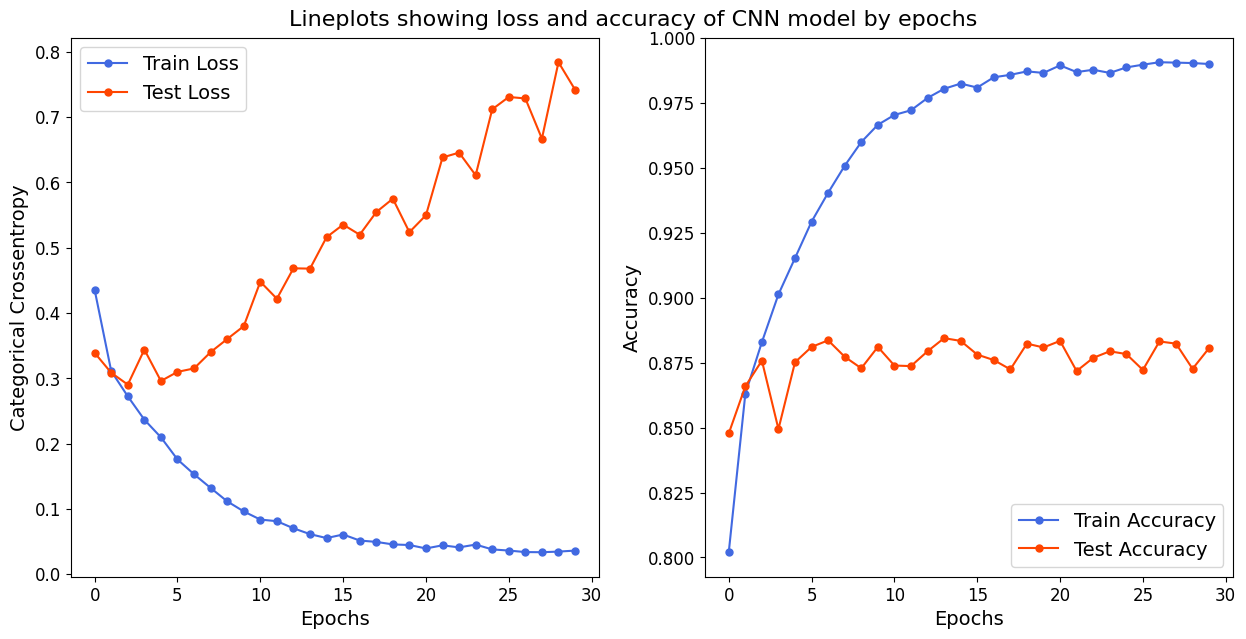

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

In [ ]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Success rate: {:5.2f}%".format(100*acc))

149/149 - 1s - loss: 0.7422 - accuracy: 0.8806 - 551ms/epoch - 4ms/step
Success rate: 88.06%


In [ ]:
labels =["Male","Female"]
import matplotlib.pyplot as plt

149/149 [==============================] - 1s 3ms/step


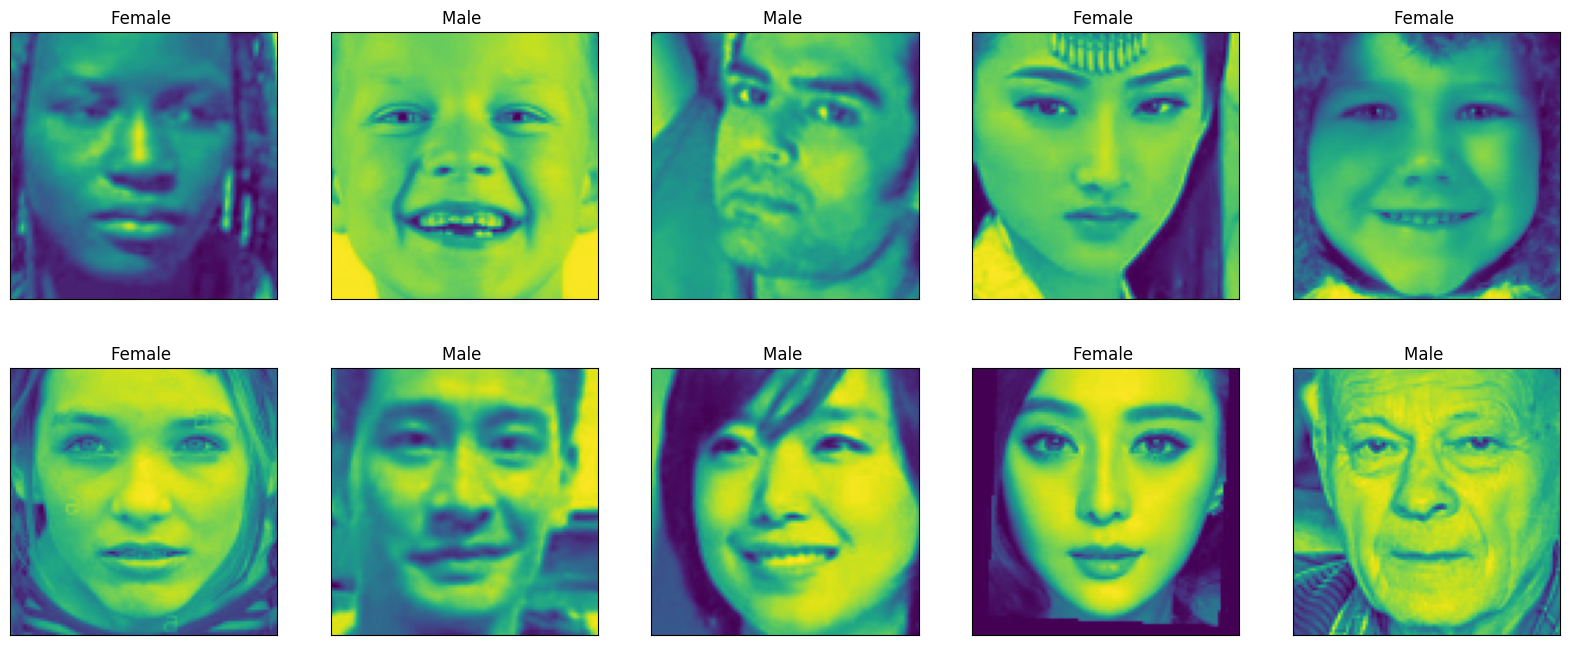

In [ ]:
Y = model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(Y[index])
    true_index = np.argmax(y_test[index])
    
    ax.set_title("{} ".format(labels[predict_index], 
                                  color=("green" if predict_index == true_index else "red")))
plt.show()

In [ ]:
from sklearn.metrics import classification_report

...

# Evaluate the model on the test data
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Success rate: {:5.2f}%".format(100 * acc))

# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert predictions from one-hot encoding to integers
y_pred_int = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_int, target_names=labels))


149/149 - 1s - loss: 0.7422 - accuracy: 0.8806 - 501ms/epoch - 3ms/step
Success rate: 88.06%
149/149 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

        Male       0.88      0.89      0.89      2456
      Female       0.88      0.87      0.88      2286

    accuracy                           0.88      4742
   macro avg       0.88      0.88      0.88      4742
weighted avg       0.88      0.88      0.88      4742

